In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# CIFAR-10
CIFAR-10 is a dataset of 60,000 color images categorized into 10 classes.

It is widely used for image classification tasks in deep learning and computer vision.

## Attribute Description
Image size : 32×32 pixels, RGB

Total images : 60,000 (50,000 training, 10,000 test)

Number of classes : 10

0: airplane ✈️

1: automobile 🚗

2: bird 🐦

3: cat 🐱

4: deer 🦌

5: dog 🐶

6: frog 🐸

7: horse 🐴

8: ship 🚢

9: truck 🚚

In [7]:
transform = transforms.Compose([
    transforms.ToTensor(),                  
    transforms.Normalize((0.5, 0.5, 0.5),
                         (0.5, 0.5, 0.5))
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


Image size : $32\times32\times3$ (RGB)

Filter1 : 32 $3\times3\times3$(size), padding=1, stride=1

Dropout 0.2

MaxPooling $2\times2$

------

Filter2 : 64 $3\times3\times3$(size), padding=1, stride=1

Dropout 0.2

MaxPooling $2\times2$

-----

Filter3 : 128 $3\times3\times3$(size), padding=1, stride=1

Dropout 0.2

MaxPooling $2\times2$

-----

fc1 : input size = ???(your answer) , output_size = 128

fc2 : input size 128, output_size = 10

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()       
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1, stride=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1, stride=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1, stride=1)
        self.pool3 = nn.MaxPool2d(2, 2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128*4*4, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.dropout(x)
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.dropout(x)
        x = self.pool2(x)
        x = F.relu(self.conv3(x))
        x = self.dropout(x)
        x = self.pool3(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.dropout(x) 
        x = self.fc2(x)
        return x

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [10]:
for epoch in range(30):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss:.4f}")

Epoch 1, Loss: 1067.4534
Epoch 2, Loss: 905.2362
Epoch 3, Loss: 805.9553
Epoch 4, Loss: 743.1044
Epoch 5, Loss: 706.6069
Epoch 6, Loss: 677.4076
Epoch 7, Loss: 651.4577
Epoch 8, Loss: 628.0103
Epoch 9, Loss: 605.0512
Epoch 10, Loss: 583.2936
Epoch 11, Loss: 564.7105
Epoch 12, Loss: 545.7220
Epoch 13, Loss: 530.0892
Epoch 14, Loss: 515.9572
Epoch 15, Loss: 499.8246
Epoch 16, Loss: 487.3911
Epoch 17, Loss: 475.6918
Epoch 18, Loss: 465.0778
Epoch 19, Loss: 452.9377
Epoch 20, Loss: 444.3702
Epoch 21, Loss: 433.5782
Epoch 22, Loss: 424.2144
Epoch 23, Loss: 415.7012
Epoch 24, Loss: 407.2395
Epoch 25, Loss: 399.5531
Epoch 26, Loss: 391.7667
Epoch 27, Loss: 385.9831
Epoch 28, Loss: 378.2527
Epoch 29, Loss: 373.0193
Epoch 30, Loss: 365.1154


In [11]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7319


In [12]:
from torchsummary import summary
summary(model, input_size=(3, 32, 32))

# Calculate number of parameters. Submit the solution process.

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
           Dropout-2           [-1, 32, 32, 32]               0
         MaxPool2d-3           [-1, 32, 16, 16]               0
            Conv2d-4           [-1, 64, 16, 16]          18,496
           Dropout-5           [-1, 64, 16, 16]               0
         MaxPool2d-6             [-1, 64, 8, 8]               0
            Conv2d-7            [-1, 128, 8, 8]          73,856
           Dropout-8            [-1, 128, 8, 8]               0
         MaxPool2d-9            [-1, 128, 4, 4]               0
          Flatten-10                 [-1, 2048]               0
           Linear-11                  [-1, 128]         262,272
          Dropout-12                  [-1, 128]               0
           Linear-13                   [-1, 10]           1,290
Total params: 356,810
Trainable params:

✅ correct


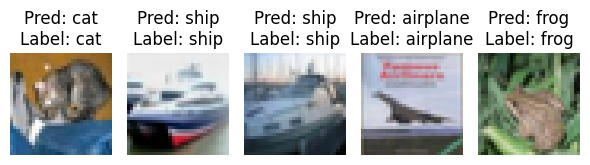

❌ wrong


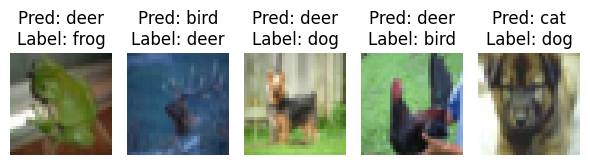

In [13]:
import matplotlib.pyplot as plt
import numpy as np

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

def imshow(img, title):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.axis('off')

def show_predictions(model, dataloader, device):
    model.eval()
    correct_samples = []
    incorrect_samples = []

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            for img, pred, label in zip(images, predicted, labels):
                if len(correct_samples) < 5 and pred == label:
                    correct_samples.append((img.cpu(), pred.item(), label.item()))
                elif len(incorrect_samples) < 5 and pred != label:
                    incorrect_samples.append((img.cpu(), pred.item(), label.item()))
                
                if len(correct_samples) >= 5 and len(incorrect_samples) >= 5:
                    break
            if len(correct_samples) >= 5 and len(incorrect_samples) >= 5:
                break

    print("✅ correct")
    plt.figure(figsize=(6, 3))
    for i, (img, pred, label) in enumerate(correct_samples):
        plt.subplot(1, 5, i+1)
        imshow(img, f"Pred: {classes[pred]}\nLabel: {classes[label]}")
    plt.tight_layout()
    plt.show()

    print("❌ wrong")
    plt.figure(figsize=(6, 3))
    for i, (img, pred, label) in enumerate(incorrect_samples):
        plt.subplot(1, 5, i+1)
        imshow(img, f"Pred: {classes[pred]}\nLabel: {classes[label]}")
    plt.tight_layout()
    plt.show()

show_predictions(model, test_loader, device)